<a href="https://colab.research.google.com/github/sgogoigh/Understanding-MNIST/blob/main/Understanding_MNIST_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding MNIST
Here, we'll understand the dataset and how we'll classify using neural networks

In [6]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# train_images & train_labels are training data
# test_images & test_labels are testing data

# mnist is an image dataset for image classification

In [3]:
train_labels
# an array of identified digits

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
print(train_labels.shape)
# 60000 labels

print(train_images.shape)
# 60000 images of 28x28 size

print(train_images.dtype)
# float32

print(train_images.ndim)
# 2 -> 2 dimensions

(60000, 10)
(60000, 784)
float32
2


## Adding layers to Neural Network

In [7]:
from keras import layers
from keras import models

# sequencial model is where all data flows in layers in a sequencial manner
# each layer has exactly one input tensor and one output tensor
#       bad for - layer sharing, multiple ip/op, non-linear topology
network = models.Sequential()

# choosing first layer of
#   dimensions of output face = 512
#   activition function = relu func
#   data input shape = 28*28 (batch_size * input_dimensions)
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

# model.weights -> tells us the weights
# model.summary -> layers, output shape, parameters in a tabular manner

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compilation of Network

In [8]:
# we need to add few steps to compile network

# optimizer -> how model updates itself
# loss func -> measuring loss and minimizing this
# metrics   -> measuring performance against something standardized

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# rmsprop -> root mean square propagation
# categorical crossentropy -> used for multi-class classification (also called softmax/log loss),
#                              measures the difference between the predicted probability distribution and the actual (true) distribution of classes.
# accuracy -> correct/total

## Preparing Data & Labels

In [9]:
# preparing test and train to fit into the network for classification
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# categorical encoding of labels -> converting them to numerical form for easier processing
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Fitting the model

In [10]:
network.fit(train_images,
            train_labels,
            epochs=5,
            batch_size=128)

# train_images -> train data
# train_labels -> train output
# epoch        -> total number of iterations of all the training data in one cycle for training
# batch-size   -> inputs per batch

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8737 - loss: 0.4362
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9668 - loss: 0.1115
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9784 - loss: 0.0707
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9843 - loss: 0.0505
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9892 - loss: 0.0366


## Testing Accuracy

In [13]:
# evaluate measures the performance based on metric chosen in network -> accuracy
train_loss, train_acc = network.evaluate(train_images, train_labels)
train_acc

test_loss, test_acc = network.evaluate(test_images, test_labels)
test_acc

# 99.04% on train vs 97.35% on test
#   since train_acc > test_acc -> hint of overfitting

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9904 - loss: 0.0328
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9735 - loss: 0.0806


0.9778000116348267

## Random Checking of Digit

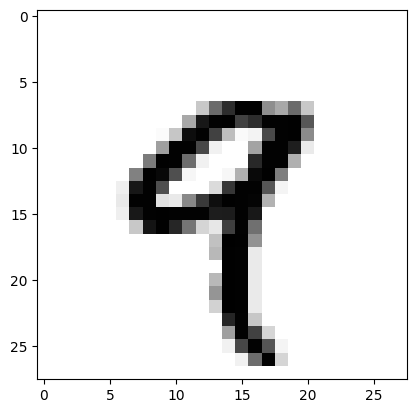

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [18]:
# random choice of training data for visualization
# data needs to be reshaped for plotting -> 28*28
digit = train_images[4].reshape(28, 28)

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

train_labels[4]
# an array returned -> 9th index is 1, rest is 0 (label = 9)